In [1]:
import os
import re
from datetime import datetime
import time
from config import *
import matplotlib.gridspec as gridspec
import matplotlib.dates as md
import matplotlib.colors as colors
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from projects.Plotting.python.plotting_layout import plotter_layout, PLOT_DIR

import matplotlib.dates as mdates
import matplotlib.patches as patches

import matplotlib.pyplot as plt
# import matplotlib
# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
matplotlib.style.use('ggplot')
%matplotlib inline


SCHEDULE_PATH = os.path.join(DATA_DIR_PATH,'schedules')

# from source.Plotters.IPlotter import IPlo

In [2]:
schedule_file = 'LHC_schedule_2017.csv'
with open(os.path.join(SCHEDULE_PATH,schedule_file),'r') as f:
    df_schedule = pd.read_csv(f)

In [3]:
df_schedule

,start,end,info,color
0,2017-05-01,2017-05-24,Recomission with beam,#ccffccff
1,2017-05-24,2017-05-29,Interleaved comissioning and intensity ramp-up,#ccd9ccf0
2,2017-05-29,2017-05-30,Scrubbing,#fabf8fff
3,2017-05-30,2017-06-06,Interleaved comissioning and intensity ramp-up,#ccd9ccf0
4,2017-06-06,2017-06-12,Scrubbing,#fabf8fff
5,2017-06-12,2017-06-30,Physics,#fde9d9ff
6,2017-06-30,2017-07-03,MD 1,#8db4e2ff
7,2017-07-03,2017-07-08,TS1,#92d050ff
8,2017-07-08,2017-07-12,recomissioning,#ccffccff
9,2017-07-12,2017-07-24,Physics,#fde9d9ff


In [4]:

blm_intervals_start = datetime.strptime('2017-05-01 00:00:00', '%Y-%m-%d %H:%M:%S')
blm_intervals_end  = datetime.strptime('2017-11-30 00:00:00', '%Y-%m-%d %H:%M:%S')

In [5]:
for i,r in df_schedule.iterrows():
    start  =  datetime.strptime(r['start'], '%Y-%m-%d')
    end  =  datetime.strptime(r['end'], '%Y-%m-%d')
    col = r['color']
    text =r['info']
    
    
#     ax.add_patch(
#             patches.Rectangle(
#                 #             (s-length/2, -width/2),   # (x,y)
#                 (start, 0),
#                 end,  # width
#                 1,  # height
#                 color=col
#             )
    
    

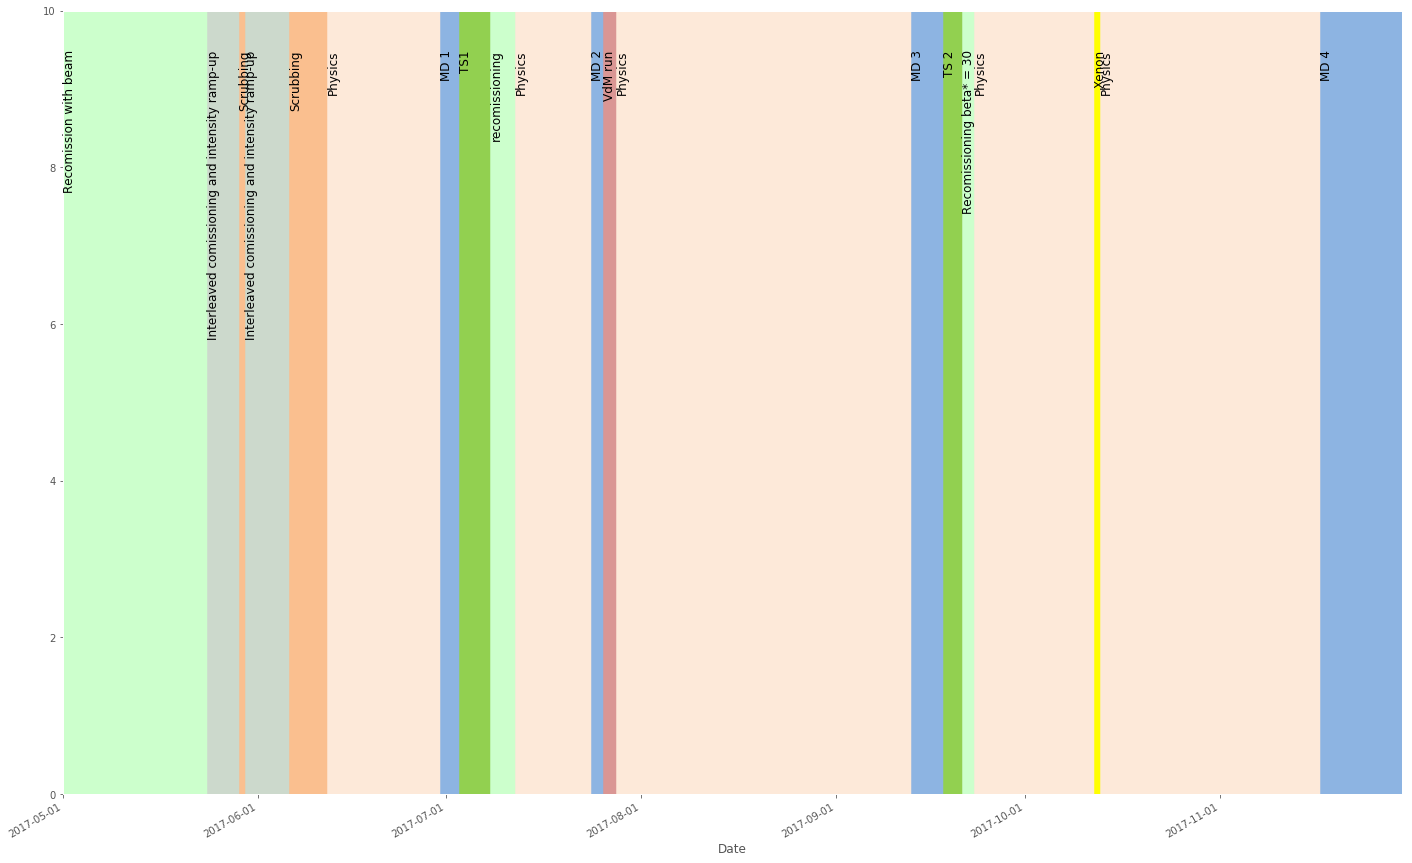

In [6]:
f, ax = plt.subplots(1, 1, figsize=[24, 16])
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()
ax.set_xlim(blm_intervals_start,blm_intervals_end)
ax.set_ylim(0,10)
f.autofmt_xdate()
plt.xlabel(r'Date')
ax.grid(True)

for i,r in df_schedule.iterrows():
    start  =  datetime.strptime(r['start'], '%Y-%m-%d')
    end  =  datetime.strptime(r['end'], '%Y-%m-%d')
    col = r['color']
    text =r['info']
    # convert to matplotlib date representation
    start = mdates.date2num(start)
    end = mdates.date2num(end)
    width = end - start
    height = ax.get_ylim()[1]
    
    ax.add_patch(
        patches.Rectangle(
                #             (s-length/2, -width/2),   # (x,y)
                (start, 0),
                end,  # width
                height,  # height
                color=col[:],
                alpha = 1
                ))
    ax.text(start, 0.95*height, text, ha='left', va='top', color='k', fontsize=12, rotation=90)
# plt.ylabel(r'TID [Gy]')